In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs
import math
import copy
import time

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder # one-hot encoding
from sklearn.decomposition import PCA # PCA
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.model_selection import KFold # K-fold validation
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import random
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
def dist(data, c):
    d = []
    for i in range(len(data)):
        d.append(0)
        for j in range(len(c)):
            d[i] += (data[i][j]-c[j])**2
        d[i] = math.sqrt(d[i])
    return d

In [86]:
""" Model Construciton """

def assignment(df, c):
    for i in c.keys():
        df['distance_from_{}'.format(i)] = dist(df.values, c[i])
    cen_dist_col = ['distance_from_{}'.format(i) for i in c.keys()]
    df['closest'] = df.loc[:, cen_dist_col].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    return df

def update(df, c):
    for i in c.keys():
        Filter = df['closest'] == i
        for j in range(len(c[1])):
            tmp = df.loc[Filter, :]
            mean = np.mean(tmp.iloc[:, j])
            if not math.isnan(mean):
                c[i][j] = mean
    return c

def Kmeans(df, c):
    # Initializing 'closest' column
    df['closest'] = [1] * 210
    
    # Split into clusters
    for i in range(9999):
        closest_col = df['closest']

        # Assignment
        df = assignment(df, c)
        # Update
        new_c = update(df, c)

        # if centroid did not move -> break
        if(closest_col.equals(df['closest'])):
            break
        # else, go to next iteration
        c = new_c
    
    return df, new_c

def predict(X_d, y):
    X_d['label'] = y
    X_d['pred'] = [0] * 210
    mapping = []
    for i in range(3):
        Filter = X_d['closest'] == i+1
        cnt = X_d[Filter]['label'].value_counts()
        if cnt.size != 0:
            X_d.loc[Filter, 'pred'] = cnt.idxmax()
            mapping.append(cnt.idxmax())
    
    if(len(mapping) < 3):
        for i in range(len(mapping)-3):
            mapping.append(0)
            
    return X_d, mapping

In [94]:
""" Data input """
col_names = ['area', 'perimeter', 'compactness', 'length-of-kernel', 'width-of-kernel', 'asymmetry-coefficient', 'length-of-kernel-groove', 'label']
data = pd.read_csv('seeds_dataset.txt', sep="\s+", engine='python', names=col_names)

""" Data preprocessing """

# shuffle
data = data.sample(frac=1)

# feature/label split
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

[[29 17 24]
 [15 27 28]
 [23 17 30]]
              precision    recall  f1-score   support

           1       0.43      0.41      0.42        70
           2       0.44      0.39      0.41        70
           3       0.37      0.43      0.39        70

    accuracy                           0.41       210
   macro avg       0.41      0.41      0.41       210
weighted avg       0.41      0.41      0.41       210



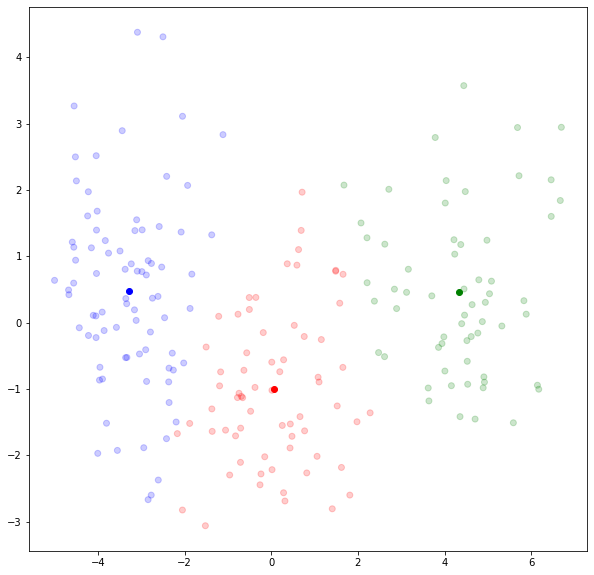

In [95]:
""" Question """
pca = PCA(2) 
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)

# Generate centroids
np.random.seed(int(time.time()))
k = 3
q_centroids = {
    i+1:[np.random.uniform(-5,5), np.random.uniform(-5,5)]
    for i in range(k)
}

X_dist, centroids = Kmeans(X_pca, q_centroids)
df, mapping = predict(X_dist, y)
print(confusion_matrix(df['label'].values, df['pred'].values))
print(classification_report(df['label'].values, df['pred'].values))

colormap = {0:'w', 1:'r', 2:'g', 3:'b'}
colors = map(lambda x:colormap[x], X_dist['pred'])

fig = plt.figure(figsize=(10,10))
plt.scatter(X_pca[0], X_pca[1], color=list(colors), alpha=0.2)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colormap[mapping[i-1]])
plt.show()

In [89]:
# Generate centroids
np.random.seed(int(time.time()))
k = 3
centroids = {
    i+1:[np.random.uniform(10,20), np.random.uniform(10,20), np.random.uniform(0,1), np.random.uniform(4,7), np.random.uniform(2,4), np.random.uniform(1,5), np.random.uniform(4,6)]
    for i in range(k)
}

X_dist, centroids = Kmeans(X, centroids)
df, _ = predict(X_dist, y)
print(confusion_matrix(df['label'].values, df['pred'].values))
print(classification_report(df['label'].values, df['pred'].values))

[[57  1 12]
 [10 60  0]
 [ 0  0 70]]
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        70
           2       0.98      0.86      0.92        70
           3       0.85      1.00      0.92        70

    accuracy                           0.89       210
   macro avg       0.90      0.89      0.89       210
weighted avg       0.90      0.89      0.89       210

